In [1]:
import pandas as pd

In [5]:
import os 
os.chdir ('E://Netology/AML/1._Лекция')

In [6]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

# Отображение графика

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

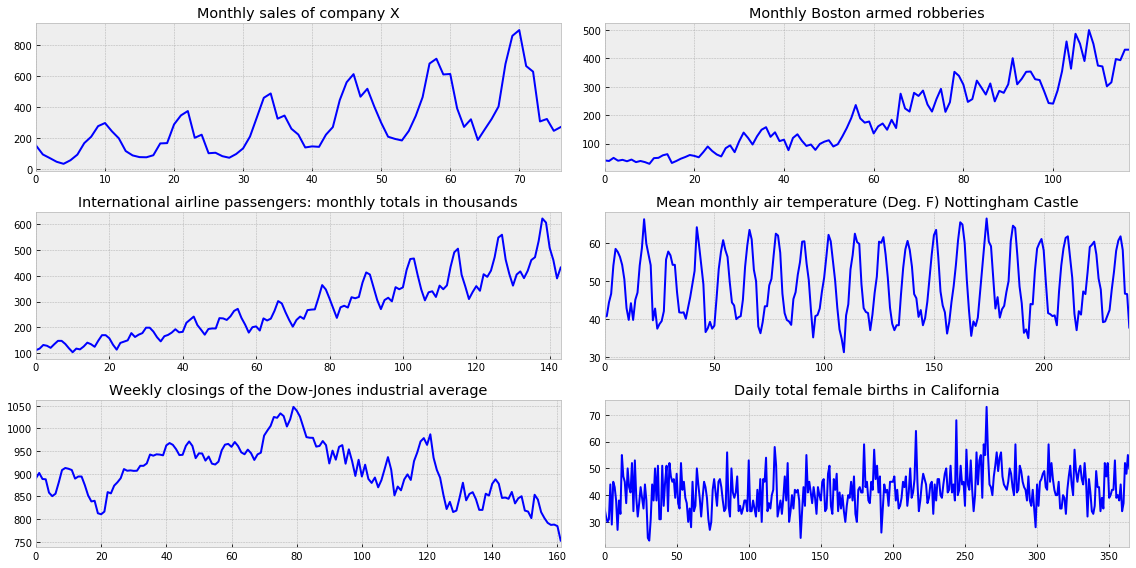

In [18]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2    
        y = int((i - x) / 2)        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Ищем сезонность

In [19]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

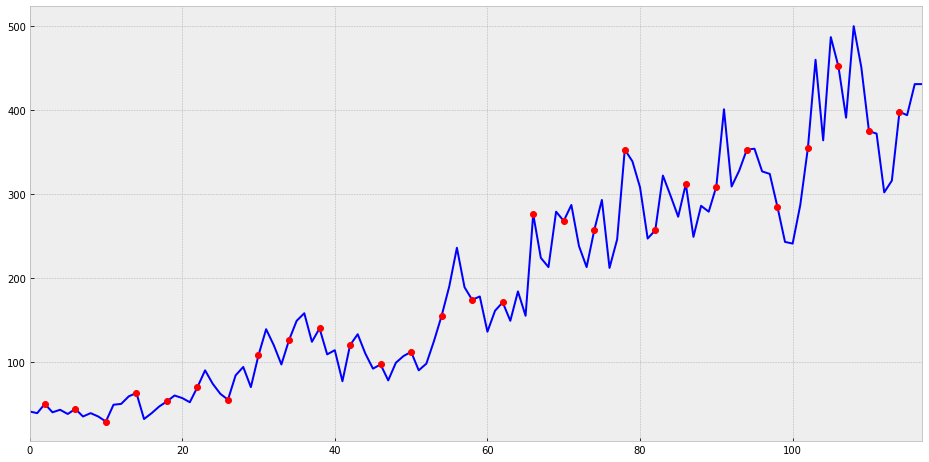

In [54]:
plot_ts_and_points(robberies_in_boston['Count'], 2, 4)

# Нормализуем дисперсию

In [27]:
from scipy.stats import boxcox

In [55]:
series = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

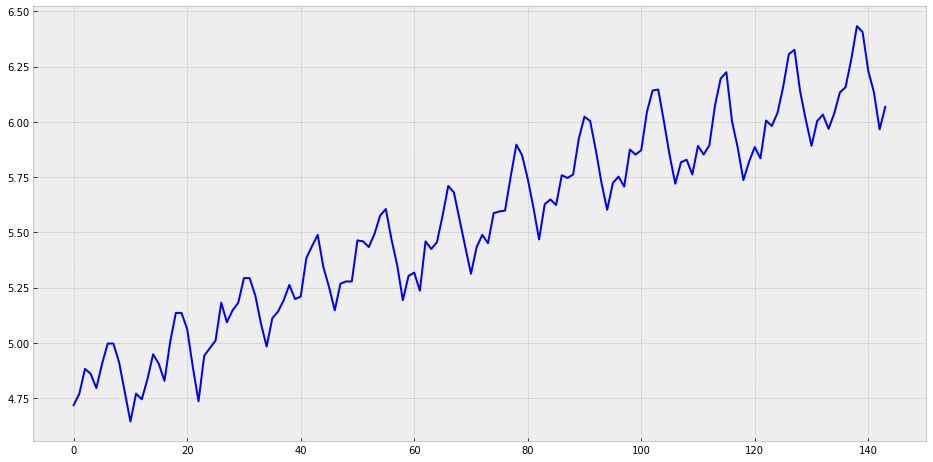

In [43]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

# Дифференцируем 

In [25]:
import numpy as np

In [56]:
series = np.diff(series, 1)

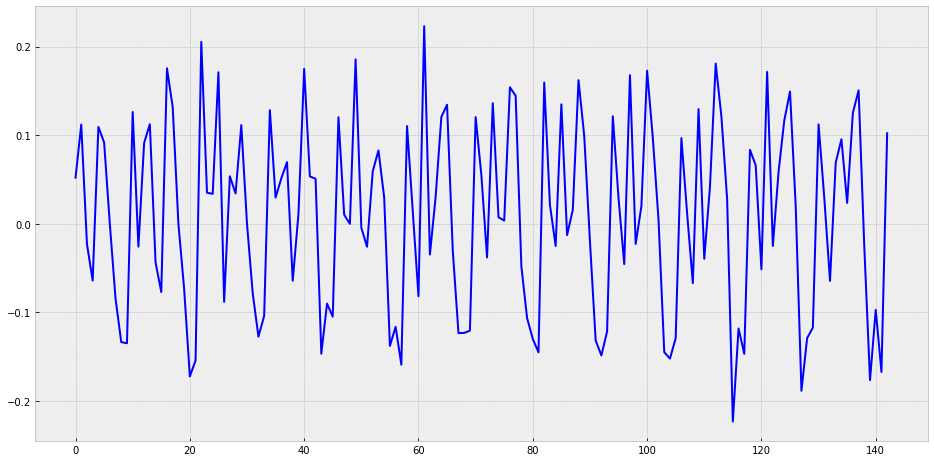

In [31]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

# Тест Дики-Фуллера 

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [57]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [17]:
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


# Коррелограммы

In [37]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [38]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

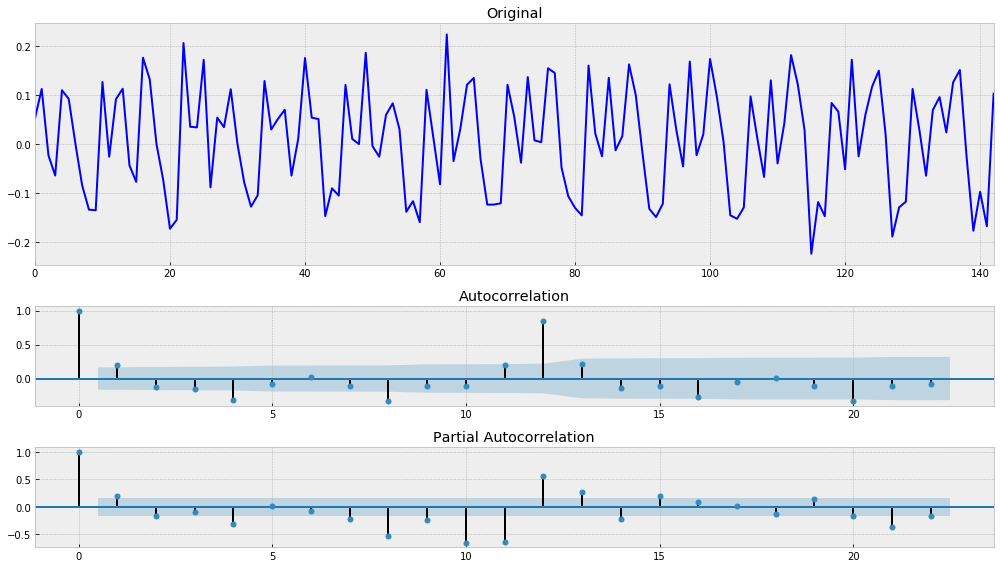

In [46]:
tsplot(series)

In [138]:
series = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)
series = np.diff(series, 1)
series = series[12:] - series[:-12]
series = series[3:] - series[:-3]


In [139]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -4.366807
p-value                          0.000340
#Lags Used                      11.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


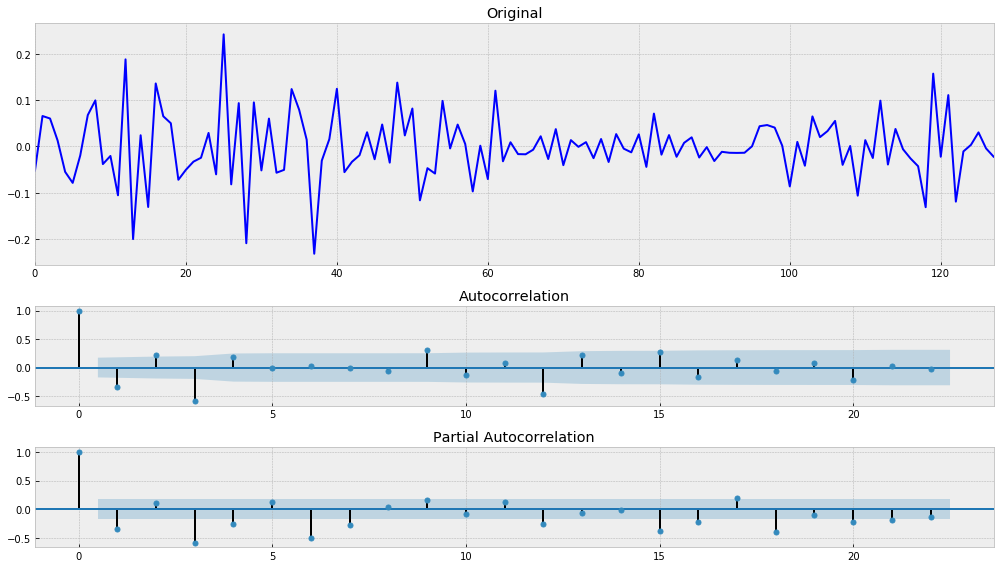

In [140]:
tsplot(series)

C:\Users\pgridchina\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


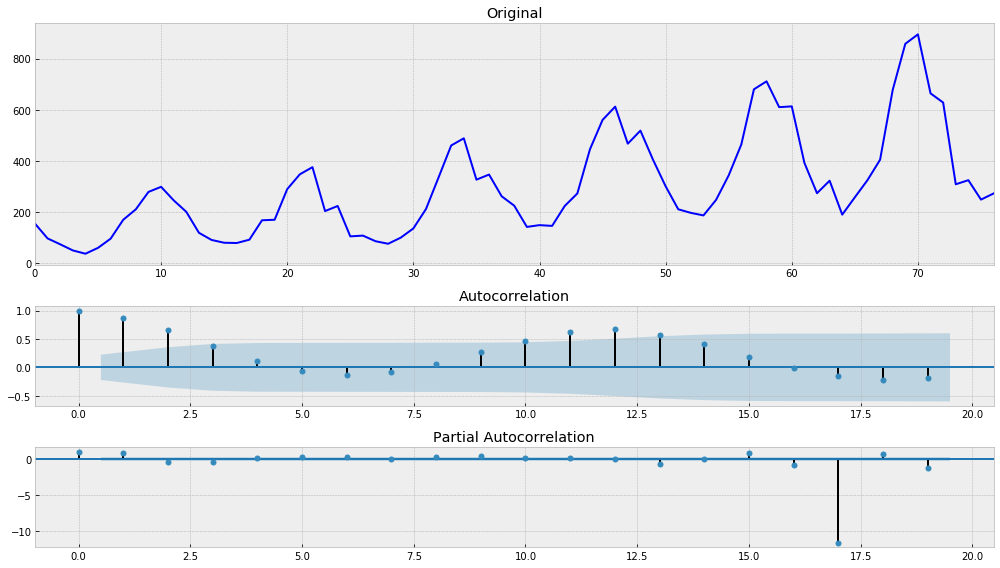

In [90]:
# займемся Monthly sales of company X

tsplot(all_series["Monthly sales of company X"])

Есть сезонность - где-то 12, есть тренд

In [157]:
series = boxcox(all_series["Monthly sales of company X"], 0)
series = np.diff(series, 1)

series = series[12:] - series[:-12]
series = series[11:] - series[:-11]

test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.134684e+01
p-value                        1.022135e-20
#Lags Used                     0.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


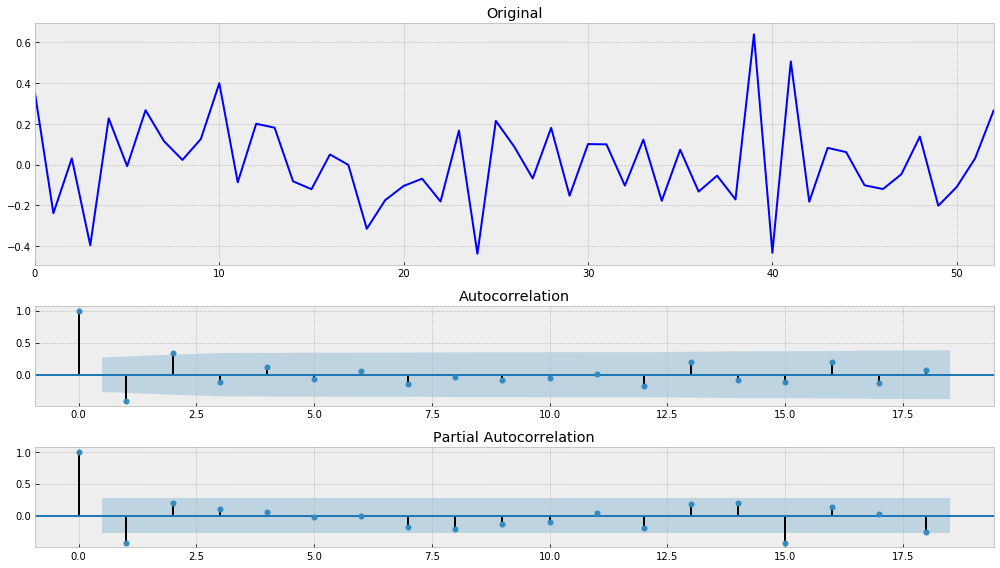

In [158]:
tsplot(series)

# А что правильнее - убрать сезонность 11 и 12 или взять 2 производные?

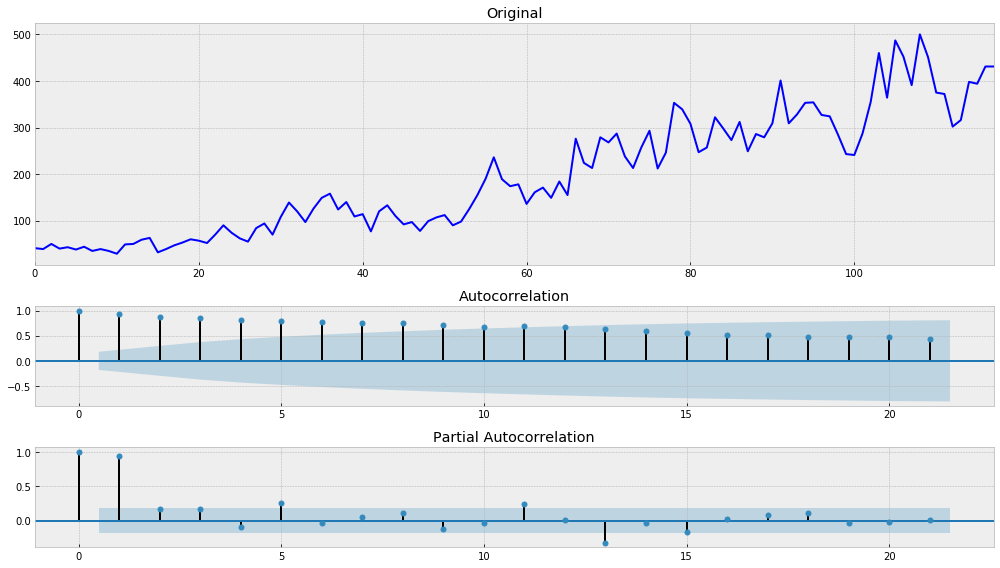

In [159]:
# Monthly Boston armed robberies

tsplot(all_series["Monthly Boston armed robberies"])

Есть тренд. А вот с сезонностью пока не очень понятно

In [168]:
series = boxcox(all_series["Monthly Boston armed robberies"], 0)
series = np.diff(series, 1)

#series = series[12:] - series[:-12]


test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


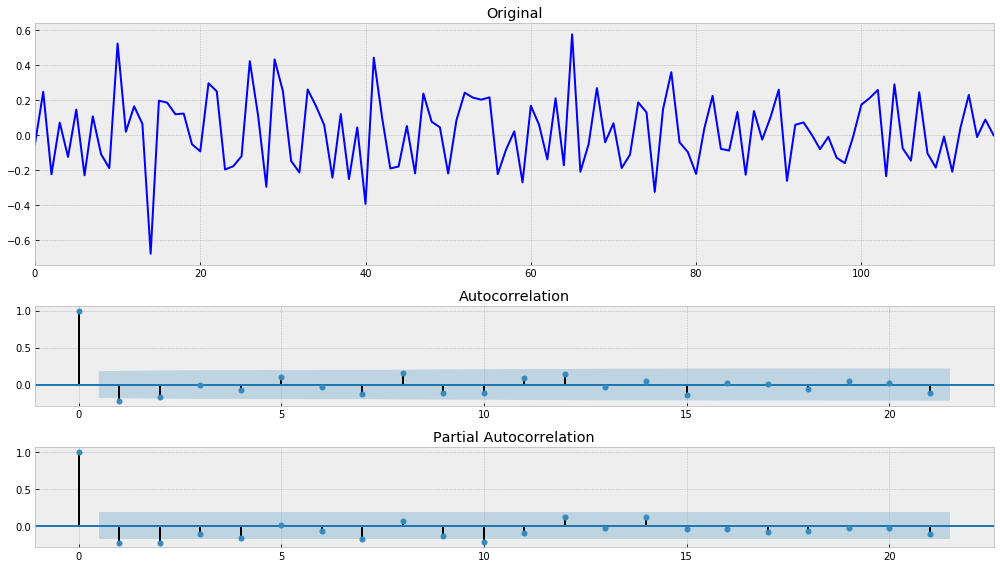

In [169]:
tsplot(series)

нет сезонности

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


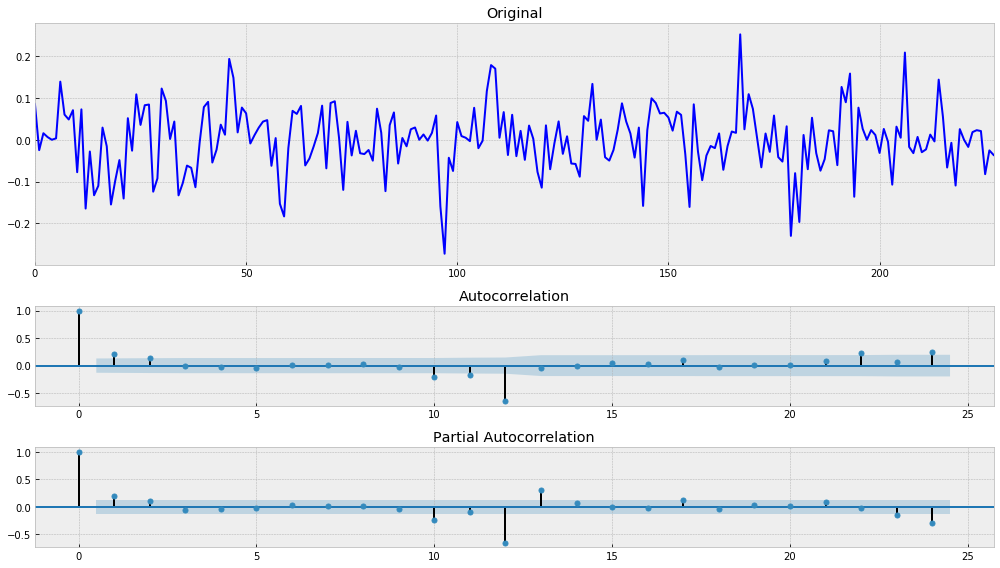

In [175]:
#  В Mean monthly air temperature (Deg. F) Nottingham Castle   нет тренда, но есть сезонность
series = boxcox(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"], 0)
#series = np.diff(series, 1)

series = series[12:] - series[:-12]


test_stationarity(series)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


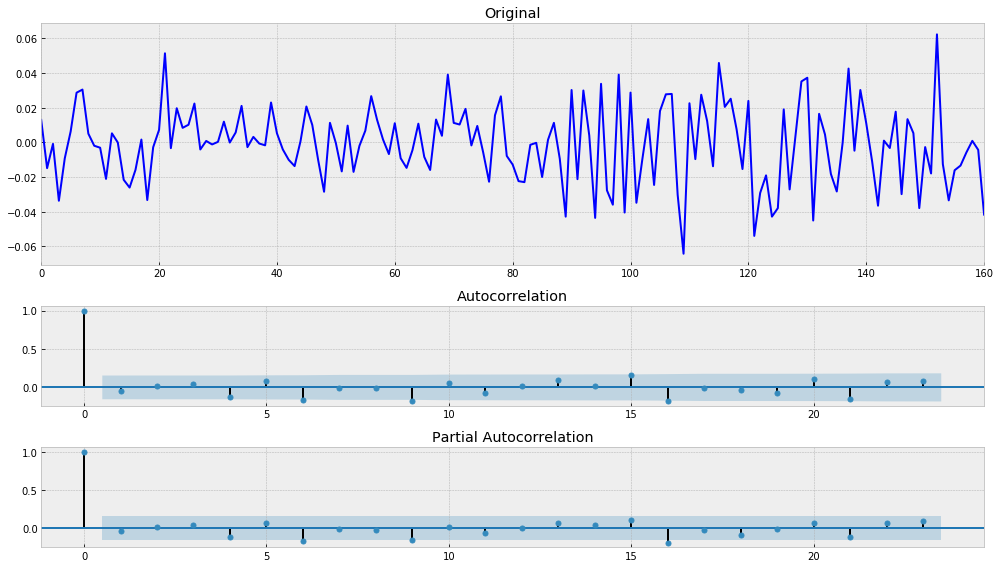

In [178]:
#  Weekly closings of the Dow-Jones industrial average Есть нелинейный тренд, но нет сезонности
series = boxcox(all_series["Weekly closings of the Dow-Jones industrial average"], 0)
series = np.diff(series, 1)

#series = series[12:] - series[:-12]


test_stationarity(series)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.262518e+01
p-value                        1.547240e-23
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


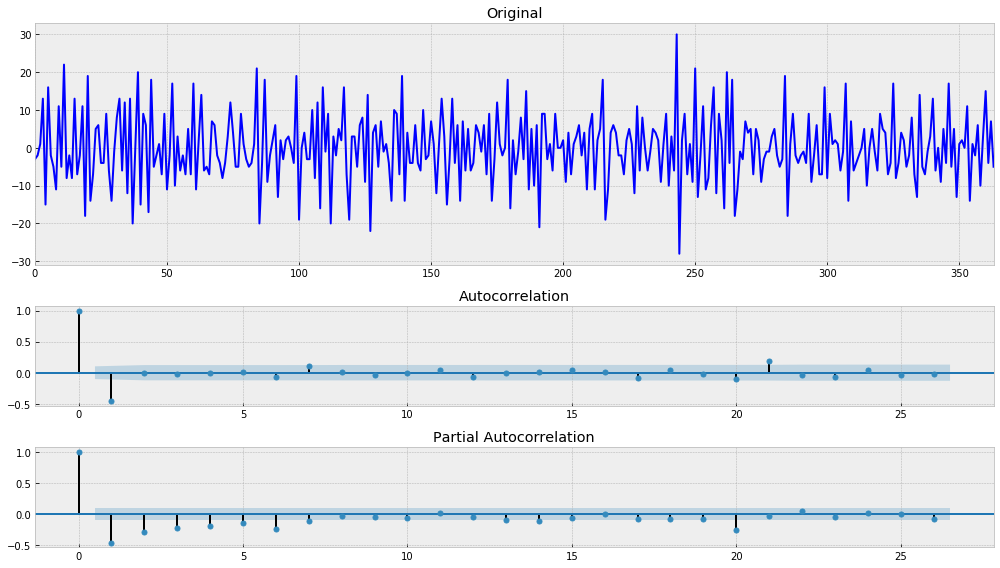

In [182]:
#  Daily total female births in California в общем-то стационарный ряд. Но если дифференцировать, то получается еще лучше )
series = all_series["Daily total female births in California"]
#series = boxcox(all_series["Daily total female births in California"], 0)
series = np.diff(series, 1)

test_stationarity(series)
tsplot(series)